## Smoke impact on infant's development

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('babies.csv')

In [3]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [5]:
print("Dataset shape:", df.shape)
print("\nMissing Values per column:\n")
print(df.isnull().sum())

Dataset shape: (1236, 8)

Missing Values per column:

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64


In [6]:
df


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


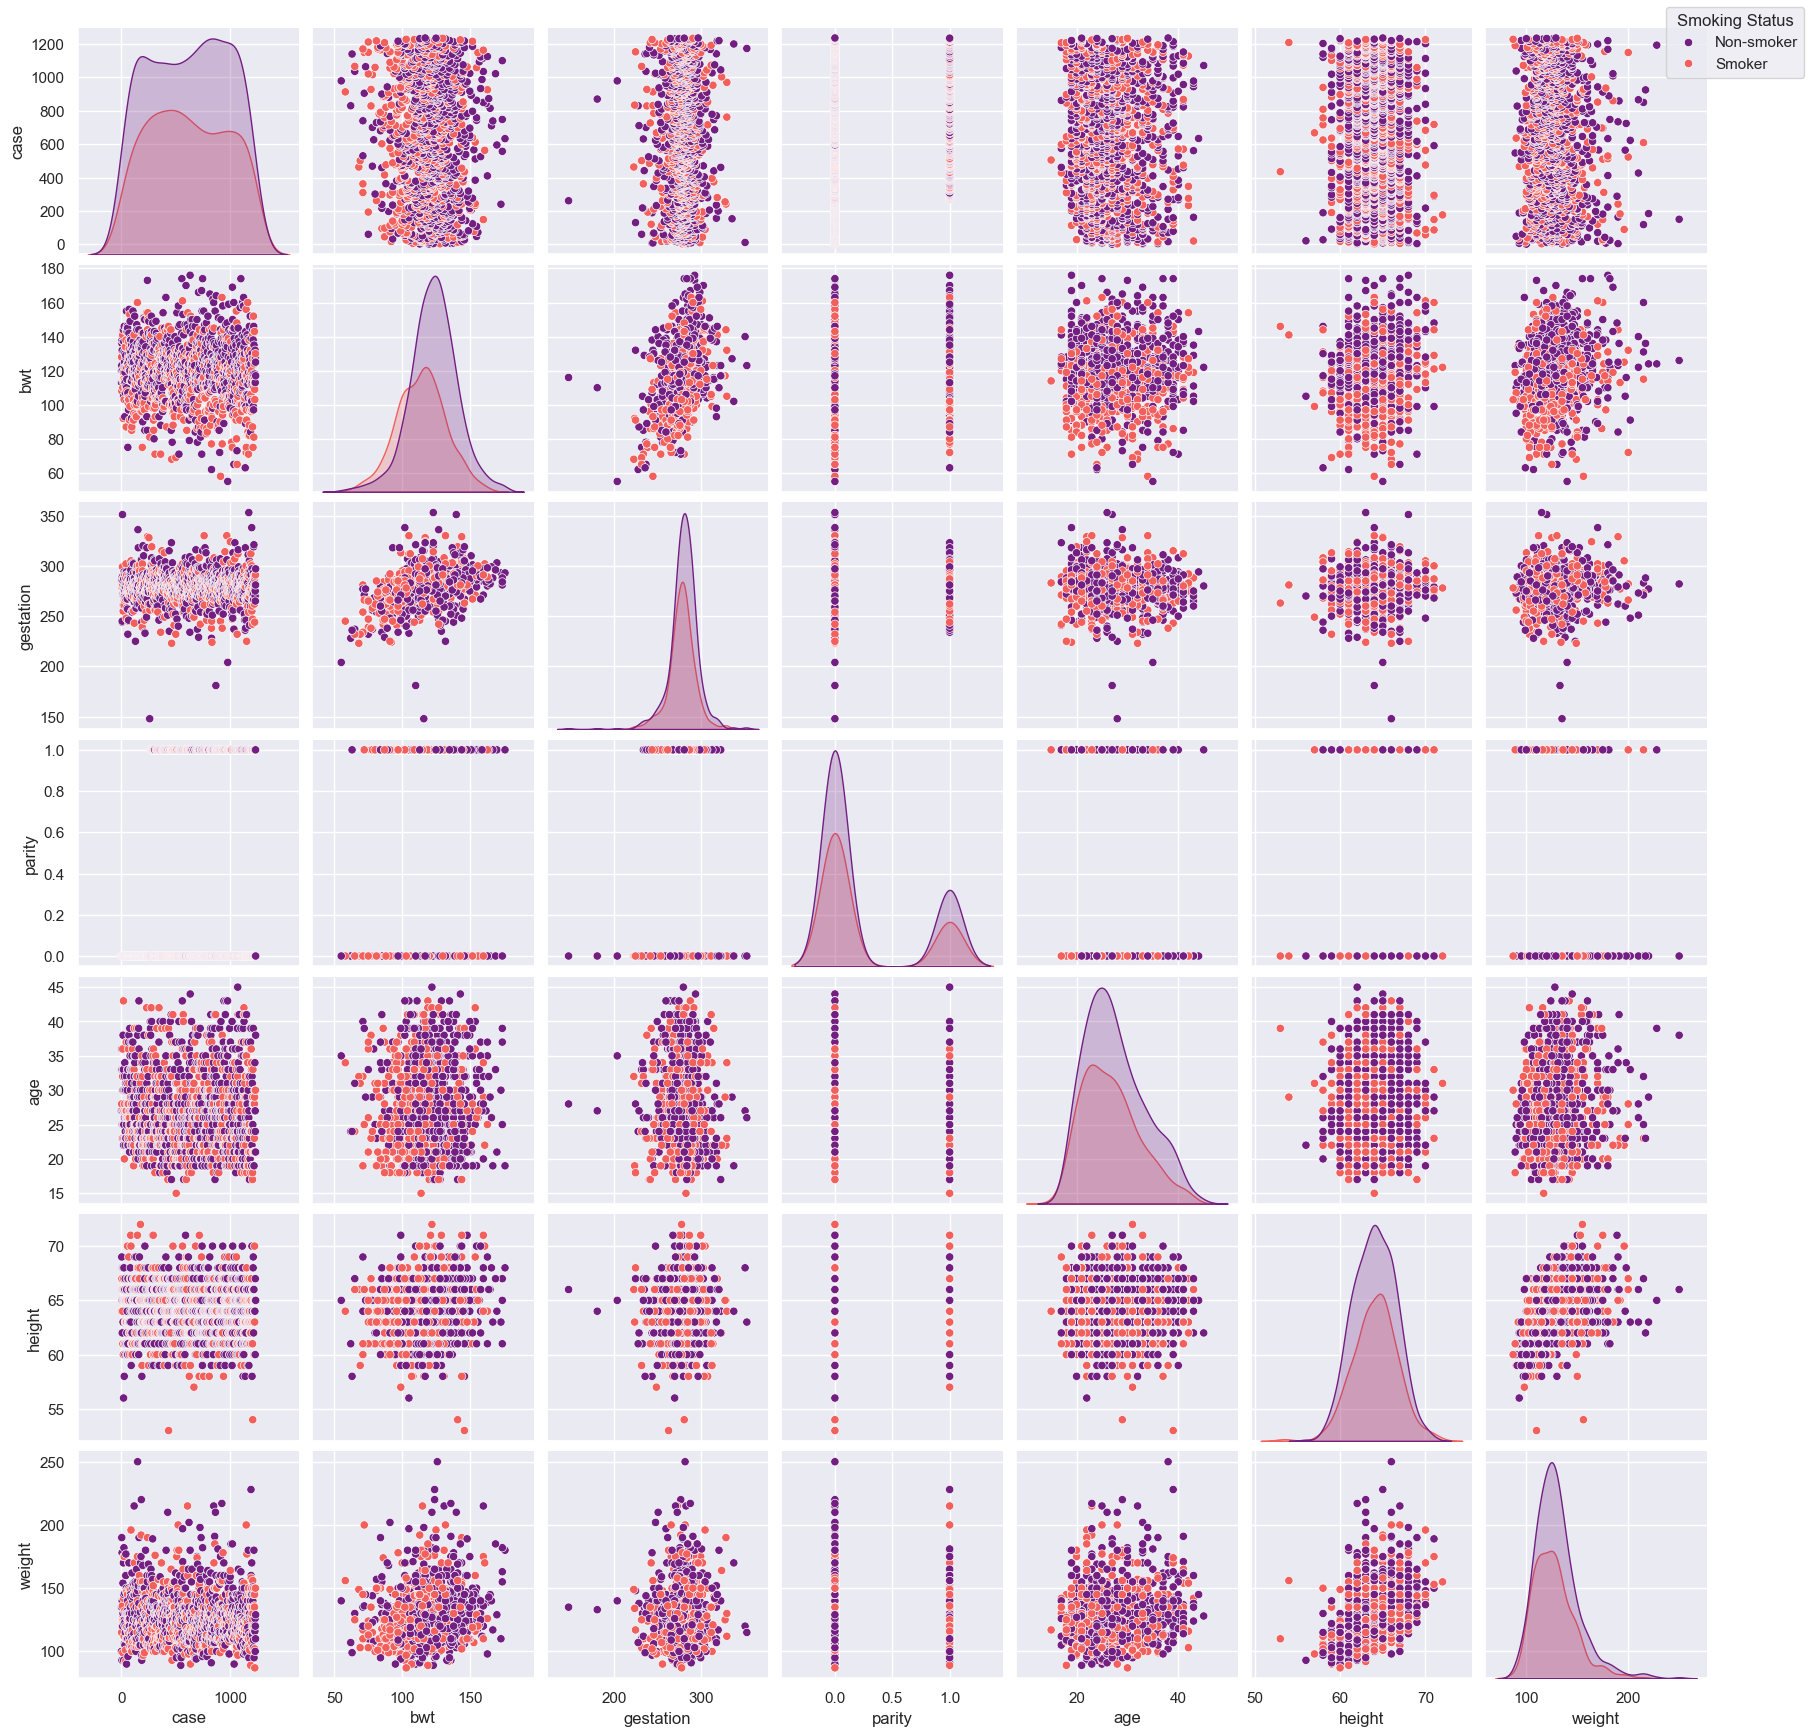

In [37]:
g = sns.pairplot(df, palette='magma', hue='smoke')
g._legend.remove()
handles = g._legend_data.values()
labels = ['Non-smoker', 'Smoker']
g.fig.legend(handles=handles, labels=labels, title='Smoking Status', loc='upper right')
plt.show()

<Axes: >

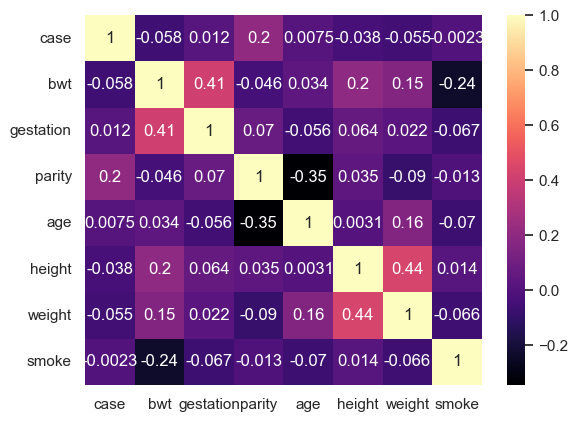

In [8]:
sns.heatmap(df.corr(), cmap='magma', annot=True)

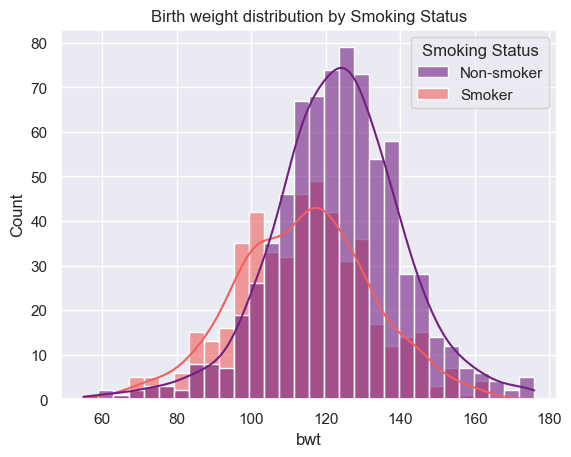

In [53]:
ax = sns.histplot(data=df, x='bwt', hue='smoke', kde=True, palette='magma', alpha=0.6)
plt.title('Birth weight distribution by Smoking Status')
legend = ax.get_legend()
legend.set_title('Smoking Status')
labels_map = {'0.0': 'Non-smoker', '1.0': 'Smoker'}
for text in legend.texts:
    if text.get_text() in labels_map:
        text.set_text(labels_map[text.get_text()])
plt.show()

In [10]:
#Influence of smoking in overall health of the baby

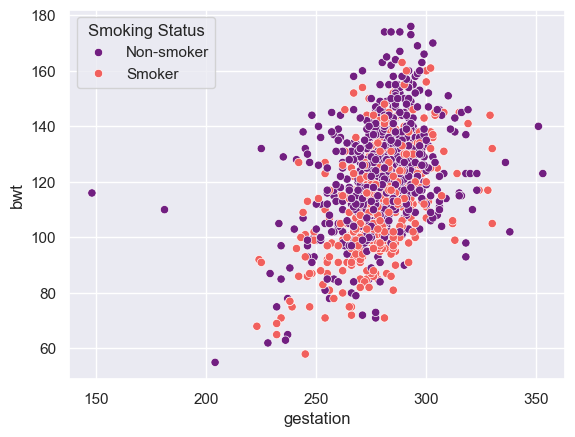

In [54]:
ax = sns.scatterplot(data=df, x='gestation', y='bwt', hue='smoke', palette='magma')
legend = ax.get_legend()
legend.set_title('Smoking Status')
labels_map = {'0.0': 'Non-smoker', '1.0': 'Smoker'}
for text in legend.texts:
    if text.get_text() in labels_map:
        text.set_text(labels_map[text.get_text()])
plt.show()

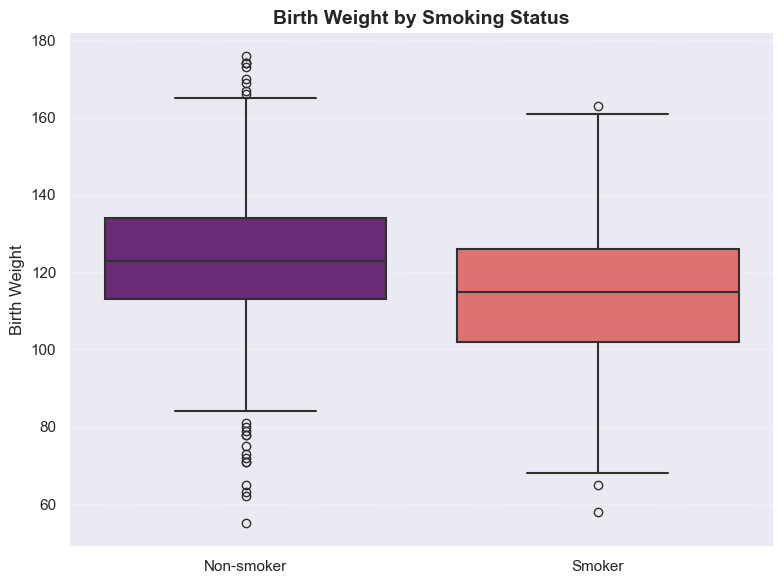

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoke', y='bwt', palette='magma', linewidth=1.5)
plt.title('Birth Weight by Smoking Status', fontsize=14, weight='bold')
plt.ylabel('Birth Weight', fontsize=12)
plt.xlabel('')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'], fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

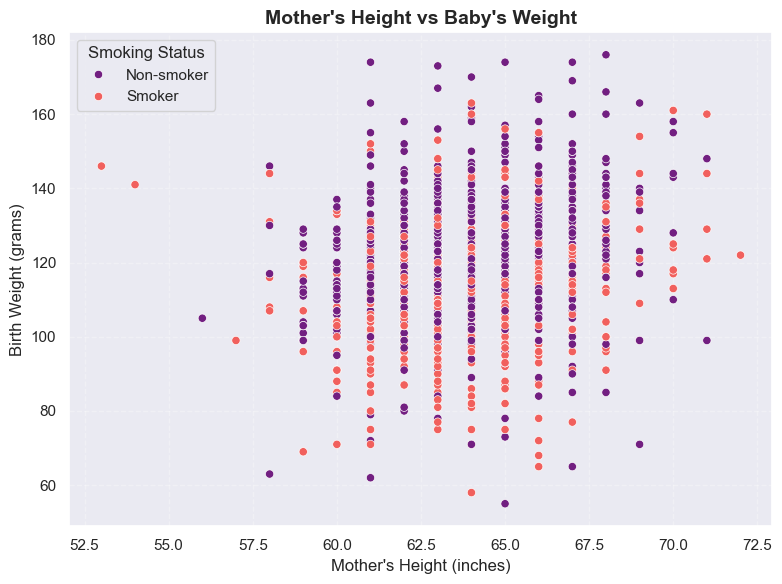

In [57]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='height', y='bwt', hue='smoke', palette='magma')
plt.title("Mother's Height vs Baby's Weight", fontsize=14, weight='bold')
plt.xlabel("Mother's Height (inches)", fontsize=12)
plt.ylabel("Birth Weight (grams)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
legend = ax.get_legend()
legend.set_title('Smoking Status')
label_map = {'0.0': 'Non-smoker', '1.0': 'Smoker'}
for text in legend.texts:
    if text.get_text() in label_map:
        text.set_text(label_map[text.get_text()])
plt.tight_layout()
plt.show()

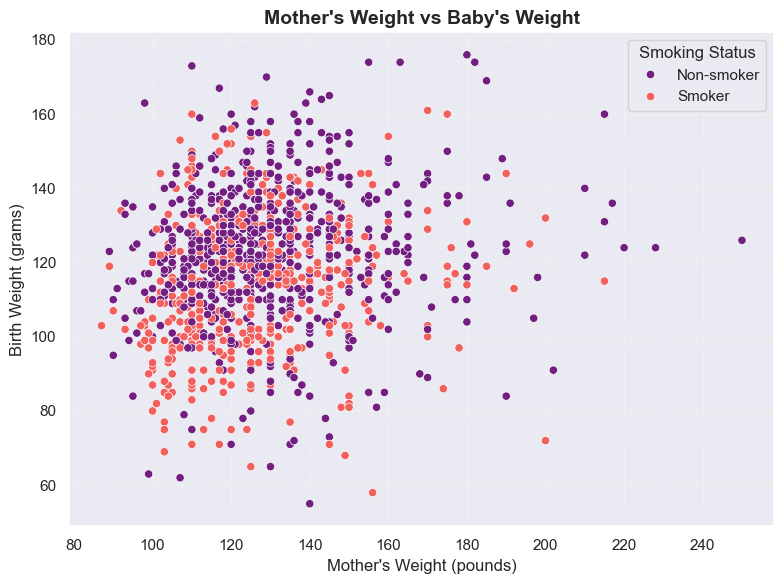

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='weight', y='bwt', hue='smoke', palette='magma')
plt.title("Mother's Weight vs Baby's Weight", fontsize=14, weight='bold')
plt.xlabel("Mother's Weight (pounds)", fontsize=12)
plt.ylabel("Birth Weight (grams)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
legend = ax.get_legend()
legend.set_title('Smoking Status')
for text in legend.texts:
    if text.get_text() in label_map:
        text.set_text(label_map[text.get_text()])
plt.tight_layout()
plt.show()

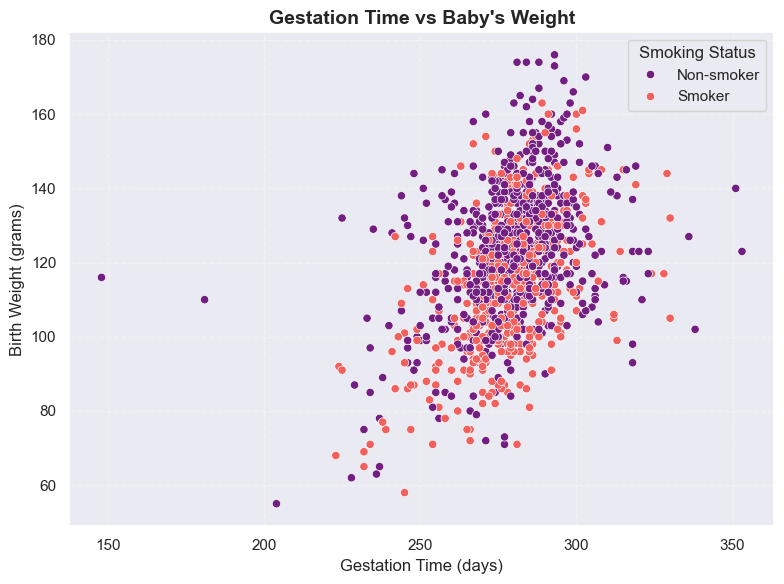

In [59]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='gestation', y='bwt', hue='smoke', palette='magma')
plt.title("Gestation Time vs Baby's Weight", fontsize=14, weight='bold')
plt.xlabel("Gestation Time (days)", fontsize=12)
plt.ylabel("Birth Weight (grams)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
legend = ax.get_legend()
legend.set_title('Smoking Status')
for text in legend.texts:
    if text.get_text() in label_map:
        text.set_text(label_map[text.get_text()])
plt.tight_layout()
plt.show()

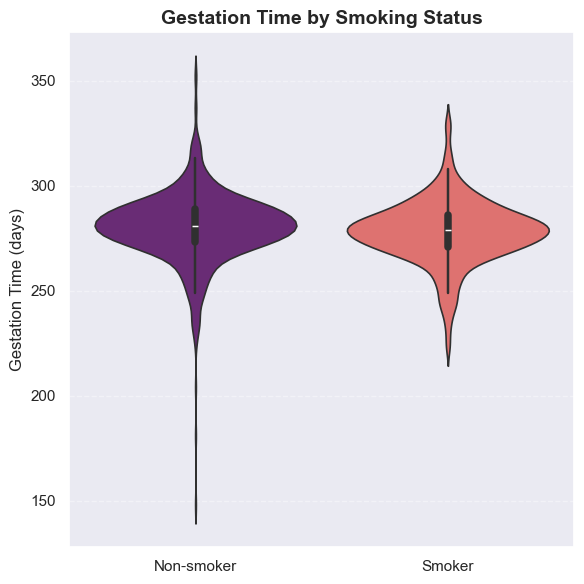

In [60]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df, x='smoke', y='gestation', palette='magma', inner='box', linewidth=1.2)
plt.xticks([0, 1], ['Non-smoker', 'Smoker'], fontsize=11)
plt.title('Gestation Time by Smoking Status', fontsize=14, weight='bold')
plt.ylabel("Gestation Time (days)", fontsize=12)
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [17]:
mean_gestation_non_smokers = df[df['smoke'] == 0]['gestation'].mean()
mean_gestation_smokers = df[df['smoke'] == 1]['gestation'].mean()

# Print results
print(f"Mean gestation (non-smokers): {mean_gestation_non_smokers:.2f}")
print(f"Mean gestation (smokers): {mean_gestation_smokers:.2f}")

Mean gestation (non-smokers): 280.19
Mean gestation (smokers): 277.98
